# **Probability Prediction Project**

> ## **Load the Data**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv('training_set_features.csv')

> ## **Data Exploration**

In [7]:
data.shape

(26707, 36)

In [8]:
data.head(3)

respondent_id  xyz_concern  xyz_knowledge  behavioral_antiviral_meds  \
0              0          1.0            0.0                        0.0   
1              1          3.0            2.0                        0.0   
2              2          1.0            1.0                        0.0   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                   0.0                   0.0                    0.0   
1                   1.0                   0.0                    1.0   
2                   1.0                   0.0                    0.0   

   behavioral_large_gatherings  behavioral_outside_home  \
0                          0.0                      1.0   
1                          0.0                      1.0   
2                          0.0                      0.0   

   behavioral_touch_face  ...             income_poverty  marital_status  \
0                    1.0  ...              Below Poverty     Not Married   
1                    1.0  ...              Below Poverty     Not Married   
2                    0.0  ...  <= $75,000, Above Poverty     Not Married   

   rent_or_own   employment_status  hhs_geo_region                census_msa  \
0          Own  Not in Labor Force        oxchjgsf                   Non-MSA   
1         Rent            Employed        bhuqouqj  MSA, Not Principle  City   
2          Own            Employed        qufhixun  MSA, Not Principle  City   

   household_adults  household_children  employment_industry  \
0               0.0                 0.0                  NaN   
1               0.0                 0.0             pxcmvdjn   
2               2.0                 0.0             rucpziij   

   employment_occupation  
0                    NaN  
1               xgwztkwe  
2               xtkaffoo  

[3 rows x 36 columns]

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   xyz_concern                  26615 non-null  float64
 2   xyz_knowledge                26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_xyz              24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [10]:
#Checking for null values
data.isnull().tail()

respondent_id  xyz_concern  xyz_knowledge  behavioral_antiviral_meds  \
26702          False        False          False                      False   
26703          False        False          False                      False   
26704          False        False          False                      False   
26705          False        False          False                      False   
26706          False        False          False                      False   

       behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
26702                 False                 False                  False   
26703                 False                 False                  False   
26704                 False                 False                  False   
26705                 False                 False                  False   
26706                 False                 False                  False   

       behavioral_large_gatherings  behavioral_outside_home  \
26702                        False                    False   
26703                        False                    False   
26704                        False                    False   
26705                        False                    False   
26706                        False                    False   

       behavioral_touch_face  ...  income_poverty  marital_status  \
26702                  False  ...           False           False   
26703                  False  ...           False           False   
26704                  False  ...            True           False   
26705                   True  ...           False           False   
26706                  False  ...           False           False   

       rent_or_own  employment_status  hhs_geo_region  census_msa  \
26702        False              False           False       False   
26703        False              False           False       False   
26704        False               True           False       False   
26705        False              False           False       False   
26706        False              False           False       False   

       household_adults  household_children  employment_industry  \
26702             False               False                 True   
26703             False               False                False   
26704             False               False                 True   
26705             False               False                False   
26706             False               False                 True   

       employment_occupation  
26702                   True  
26703                  False  
26704                   True  
26705                  False  
26706                   True  

[5 rows x 36 columns]

In [11]:
data.isnull().sum()

respondent_id                      0
xyz_concern                       92
xyz_knowledge                    116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_xyz                 2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_xyz_vacc_effective       391
opinion_xyz_risk                 388
opinion_xyz_sick_from_vacc       395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [12]:
data.dropna(how='any').shape

(6437, 36)

In [13]:
data.shape

(26707, 36)

In [14]:
data.dropna(how='all').shape

(26707, 36)

In [15]:
data.shape

(26707, 36)

In [16]:
data.duplicated().sum()  #Check for duplicates

0

In [17]:
df=data.drop('respondent_id',axis=1)

In [18]:
df.head(2)

xyz_concern  xyz_knowledge  behavioral_antiviral_meds  \
0          1.0            0.0                        0.0   
1          3.0            2.0                        0.0   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                   0.0                   0.0                    0.0   
1                   1.0                   0.0                    1.0   

   behavioral_large_gatherings  behavioral_outside_home  \
0                          0.0                      1.0   
1                          0.0                      1.0   

   behavioral_touch_face  doctor_recc_xyz  ...  income_poverty  \
0                    1.0              0.0  ...   Below Poverty   
1                    1.0              0.0  ...   Below Poverty   

   marital_status  rent_or_own   employment_status  hhs_geo_region  \
0     Not Married          Own  Not in Labor Force        oxchjgsf   
1     Not Married         Rent            Employed        bhuqouqj   

                 census_msa  household_adults  household_children  \
0                   Non-MSA               0.0                 0.0   
1  MSA, Not Principle  City               0.0                 0.0   

   employment_industry  employment_occupation  
0                  NaN                    NaN  
1             pxcmvdjn               xgwztkwe  

[2 rows x 35 columns]

In [19]:
data2=pd.read_csv('training_set_labels.csv')

> ## **Merging of Datasets**
         (For easity computatio)

In [20]:
dt=pd.merge(data,
            data2,
            on='respondent_id')

In [21]:
dt.head()

respondent_id  xyz_concern  xyz_knowledge  behavioral_antiviral_meds  \
0              0          1.0            0.0                        0.0   
1              1          3.0            2.0                        0.0   
2              2          1.0            1.0                        0.0   
3              3          1.0            1.0                        0.0   
4              4          2.0            1.0                        0.0   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                   0.0                   0.0                    0.0   
1                   1.0                   0.0                    1.0   
2                   1.0                   0.0                    0.0   
3                   1.0                   0.0                    1.0   
4                   1.0                   0.0                    1.0   

   behavioral_large_gatherings  behavioral_outside_home  \
0                          0.0                      1.0   
1                          0.0                      1.0   
2                          0.0                      0.0   
3                          1.0                      0.0   
4                          1.0                      0.0   

   behavioral_touch_face  ...  rent_or_own   employment_status  \
0                    1.0  ...          Own  Not in Labor Force   
1                    1.0  ...         Rent            Employed   
2                    0.0  ...          Own            Employed   
3                    0.0  ...         Rent  Not in Labor Force   
4                    1.0  ...          Own            Employed   

   hhs_geo_region                census_msa  household_adults  \
0        oxchjgsf                   Non-MSA               0.0   
1        bhuqouqj  MSA, Not Principle  City               0.0   
2        qufhixun  MSA, Not Principle  City               2.0   
3        lrircsnp       MSA, Principle City               0.0   
4        qufhixun  MSA, Not Principle  City               1.0   

   household_children  employment_industry  employment_occupation  \
0                 0.0                  NaN                    NaN   
1                 0.0             pxcmvdjn               xgwztkwe   
2                 0.0             rucpziij               xtkaffoo   
3                 0.0                  NaN                    NaN   
4                 0.0             wxleyezf               emcorrxb   

   xyz_vaccine  seasonal_vaccine  
0            0                 0  
1            0                 1  
2            0                 0  
3            0                 1  
4            0                 0  

[5 rows x 38 columns]

In [23]:
import seaborn as sns
%matplotlib inline

<Axes: >

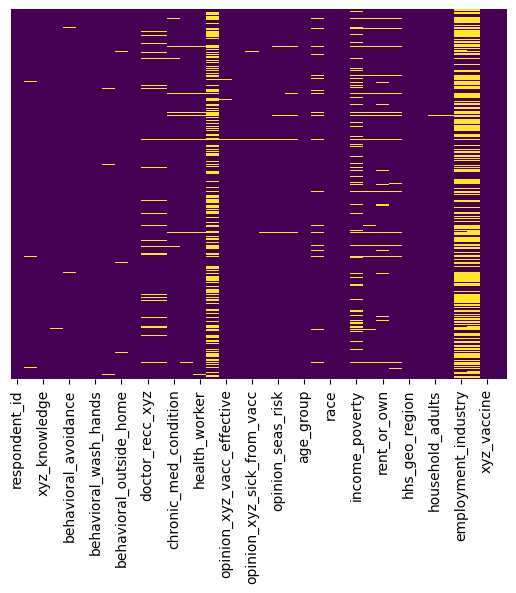

In [24]:
sns.heatmap(dt.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [25]:
df=df.drop('employment_industry',axis=1) #dropping as it has less significance and has more null values

In [26]:
for col in df.columns:
    print(len(df[col].unique()))

5
4
3
3
3
3
3
3
3
3
3
3
3
3
3
6
6
6
6
6
6
5
5
4
2
4
3
3
4
10
3
5
5
24


In [27]:
non_numerical_cols = df.select_dtypes(exclude=['number']).columns

# Print non-numerical columns
print("Non-numerical columns:", non_numerical_cols)

Non-numerical columns: Index(['age_group', 'education', 'race', 'sex', 'income_poverty',
       'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region',
       'census_msa', 'employment_occupation'],
      dtype='object')


> ## **One-Hot Encoding**

In [28]:
# List of categorical columns
categorical_cols = ['age_group', 'education', 'race', 'sex', 'income_poverty',
       'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region',
       'census_msa', 'employment_occupation']  # add all your categorical columns here

# Apply one-hot encoding to the categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_cols)

In [29]:
df_encoded

xyz_concern  xyz_knowledge  behavioral_antiviral_meds  \
0              1.0            0.0                        0.0   
1              3.0            2.0                        0.0   
2              1.0            1.0                        0.0   
3              1.0            1.0                        0.0   
4              2.0            1.0                        0.0   
...            ...            ...                        ...   
26702          2.0            0.0                        0.0   
26703          1.0            2.0                        0.0   
26704          2.0            2.0                        0.0   
26705          1.0            1.0                        0.0   
26706          0.0            0.0                        0.0   

       behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                       0.0                   0.0                    0.0   
1                       1.0                   0.0                    1.0   
2                       1.0                   0.0                    0.0   
3                       1.0                   0.0                    1.0   
4                       1.0                   0.0                    1.0   
...                     ...                   ...                    ...   
26702                   1.0                   0.0                    0.0   
26703                   1.0                   0.0                    1.0   
26704                   1.0                   1.0                    1.0   
26705                   0.0                   0.0                    0.0   
26706                   1.0                   0.0                    0.0   

       behavioral_large_gatherings  behavioral_outside_home  \
0                              0.0                      1.0   
1                              0.0                      1.0   
2                              0.0                      0.0   
3                              1.0                      0.0   
4                              1.0                      0.0   
...                            ...                      ...   
26702                          0.0                      1.0   
26703                          0.0                      0.0   
26704                          1.0                      0.0   
26705                          0.0                      0.0   
26706                          0.0                      0.0   

       behavioral_touch_face  doctor_recc_xyz  ...  \
0                        1.0              0.0  ...   
1                        1.0              0.0  ...   
2                        0.0              NaN  ...   
3                        0.0              0.0  ...   
4                        1.0              0.0  ...   
...                      ...              ...  ...   
26702                    0.0              0.0  ...   
26703                    0.0              1.0  ...   
26704                    1.0              0.0  ...   
26705                    NaN              0.0  ...   
26706                    0.0              0.0  ...   

       employment_occupation_qxajmpny  employment_occupation_rcertsgn  \
0                               False                           False   
1                               False                           False   
2                               False                           False   
3                               False                           False   
4                               False                           False   
...                               ...                             ...   
26702                           False                           False   
26703                           False                           False   
26704                           False                           False   
26705                           False                           False   
26706                           False                           False   

       employment_occupation_tfqavkke  emp

In [30]:
df_encodednull=df_encoded.fillna(0)

In [31]:
df_encodednull.isnull().sum()

xyz_concern                       0
xyz_knowledge                     0
behavioral_antiviral_meds         0
behavioral_avoidance              0
behavioral_face_mask              0
                                 ..
employment_occupation_vlluhbov    0
employment_occupation_xgwztkwe    0
employment_occupation_xqwwgdyp    0
employment_occupation_xtkaffoo    0
employment_occupation_xzmlyyjv    0
Length: 84, dtype: int64

In [32]:
df_encoded.shape

(26707, 84)

In [33]:
X_train = df_encodednull
y_train = dt[['xyz_vaccine','seasonal_vaccine']]


In [34]:
test=pd.read_csv('test_set_features.csv')

In [35]:
test.shape

(26708, 36)

In [36]:
test.head(2)

respondent_id  xyz_concern  xyz_knowledge  behavioral_antiviral_meds  \
0          26707          2.0            2.0                        0.0   
1          26708          1.0            1.0                        0.0   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                   1.0                   0.0                    1.0   
1                   0.0                   0.0                    0.0   

   behavioral_large_gatherings  behavioral_outside_home  \
0                          1.0                      0.0   
1                          0.0                      0.0   

   behavioral_touch_face  ...  income_poverty  marital_status  rent_or_own  \
0                    1.0  ...       > $75,000     Not Married         Rent   
1                    0.0  ...   Below Poverty     Not Married         Rent   

   employment_status  hhs_geo_region                census_msa  \
0           Employed        mlyzmhmf  MSA, Not Principle  City   
1           Employed        bhuqouqj                   Non-MSA   

   household_adults  household_children  employment_industry  \
0               1.0                 0.0             atmlpfrs   
1               3.0                 0.0             atmlpfrs   

   employment_occupation  
0               hfxkjkmi  
1               xqwwgdyp  

[2 rows x 36 columns]

In [37]:
df_test=test.drop('respondent_id',axis=1)

In [38]:
df_test=df_test.drop('employment_industry',axis=1)

In [39]:
non_numerical_cols = df_test.select_dtypes(exclude=['number']).columns

# Print non-numerical columns
print("Non-numerical columns:", non_numerical_cols)

Non-numerical columns: Index(['age_group', 'education', 'race', 'sex', 'income_poverty',
       'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region',
       'census_msa', 'employment_occupation'],
      dtype='object')


In [40]:
# List of categorical columns
categorical_cols = ['age_group', 'education', 'race', 'sex', 'income_poverty',
       'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region',
       'census_msa', 'employment_occupation']  # add all your categorical columns here

# Apply one-hot encoding to the categorical columns
df_test_encoded = pd.get_dummies(df_test, columns=categorical_cols)
df_test_encoded

xyz_concern  xyz_knowledge  behavioral_antiviral_meds  \
0              2.0            2.0                        0.0   
1              1.0            1.0                        0.0   
2              2.0            2.0                        0.0   
3              1.0            1.0                        0.0   
4              3.0            1.0                        1.0   
...            ...            ...                        ...   
26703          1.0            1.0                        0.0   
26704          3.0            1.0                        0.0   
26705          0.0            1.0                        0.0   
26706          3.0            1.0                        0.0   
26707          2.0            1.0                        0.0   

       behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                       1.0                   0.0                    1.0   
1                       0.0                   0.0                    0.0   
2                       0.0                   1.0                    1.0   
3                       0.0                   0.0                    0.0   
4                       1.0                   0.0                    1.0   
...                     ...                   ...                    ...   
26703                   1.0                   0.0                    1.0   
26704                   1.0                   0.0                    1.0   
26705                   0.0                   0.0                    0.0   
26706                   1.0                   0.0                    1.0   
26707                   0.0                   0.0                    1.0   

       behavioral_large_gatherings  behavioral_outside_home  \
0                              1.0                      0.0   
1                              0.0                      0.0   
2                              1.0                      1.0   
3                              0.0                      0.0   
4                              1.0                      1.0   
...                            ...                      ...   
26703                          0.0                      0.0   
26704                          1.0                      1.0   
26705                          0.0                      0.0   
26706                          0.0                      1.0   
26707                          0.0                      0.0   

       behavioral_touch_face  doctor_recc_xyz  ...  \
0                        1.0              0.0  ...   
1                        0.0              0.0  ...   
2                        1.0              0.0  ...   
3                        0.0              1.0  ...   
4                        1.0              0.0  ...   
...                      ...              ...  ...   
26703                    1.0              1.0  ...   
26704                    1.0              0.0  ...   
26705                    0.0              0.0  ...   
26706                    0.0              0.0  ...   
26707                    1.0              1.0  ...   

       employment_occupation_qxajmpny  employment_occupation_rcertsgn  \
0                               False                           False   
1                               False                           False   
2                               False                           False   
3                               False                           False   
4                               False                           False   
...                               ...                             ...   
26703                           False                           False   
26704                           False                           False   
26705                           False                           False   
26706                           False                           False   
26707                           False                           False   

       employment_occupation_tfqavkke  emp

In [41]:
df_test_encodednull=df_encoded.fillna(0)

In [42]:
X_test = df_test_encodednull

> ## **Logistic Regression Model**

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier

# Initialize the base classifier
base_classifier = LogisticRegression()

# Wrap the base classifier with MultiOutputClassifier
model = MultiOutputClassifier(base_classifier, n_jobs=-1)

# Train the model
model.fit(X_train, y_train)


MultiOutputClassifier(estimator=LogisticRegression(), n_jobs=-1)

> ## **Model Prediction**

In [46]:
# Predict probabilities
y_pred_prob = model.predict_proba(X_test)

# Convert to a DataFrame for easier viewing
# Predict probabilities
y_pred_prob = model.predict_proba(X_test)

# Convert to a DataFrame for easier viewing
# y_pred_prob is a list of arrays, one for each target variable
y_pred_prob_df = pd.DataFrame({
    'xyz_vaccine': y_pred_prob[0][:, 1],  # Probabilities of class 1 for target1
    'seasonal_vaccine': y_pred_prob[1][:, 1]   # Probabilities of class 1 for target2
})

In [47]:
y_pred_prob_df

xyz_vaccine  seasonal_vaccine
0         0.062129          0.065947
1         0.301998          0.121441
2         0.014017          0.073756
3         0.037385          0.903139
4         0.019879          0.056863
...            ...               ...
26702     0.016851          0.394432
26703     0.666247          0.655095
26704     0.189365          0.742389
26705     0.014750          0.020835
26706     0.179956          0.403993

[26707 rows x 2 columns]

In [48]:
first_col_df1 = data.iloc[:, 0]

# Step 2: Insert this column into dataframe2 as the first column
y_pred_prob_df.insert(0, first_col_df1.name, first_col_df1)

In [49]:
y_pred_prob_df

respondent_id  xyz_vaccine  seasonal_vaccine
0                  0     0.062129          0.065947
1                  1     0.301998          0.121441
2                  2     0.014017          0.073756
3                  3     0.037385          0.903139
4                  4     0.019879          0.056863
...              ...          ...               ...
26702          26702     0.016851          0.394432
26703          26703     0.666247          0.655095
26704          26704     0.189365          0.742389
26705          26705     0.014750          0.020835
26706          26706     0.179956          0.403993

[26707 rows x 3 columns]

In [50]:
y_pred_prob_df=y_pred_prob_df.round(1) #Prediction
y_pred_prob_df

respondent_id  xyz_vaccine  seasonal_vaccine
0                  0          0.1               0.1
1                  1          0.3               0.1
2                  2          0.0               0.1
3                  3          0.0               0.9
4                  4          0.0               0.1
...              ...          ...               ...
26702          26702          0.0               0.4
26703          26703          0.7               0.7
26704          26704          0.2               0.7
26705          26705          0.0               0.0
26706          26706          0.2               0.4

[26707 rows x 3 columns]

> ## **Convert to CSV file**

In [51]:
y_pred_prob_df.to_csv('predicted_probabilities.csv', index=False)